In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
import statsmodels.formula.api as smf
from statsmodels.graphics.regressionplots import influence_plot

In [2]:
toyota_data = pd.read_csv("ToyotaCorolla.csv",encoding= 'unicode_escape')
toyota_data.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


In [3]:
toyota_data.shape

(1436, 38)

In [4]:
toyota_data.columns

Index(['Id', 'Model', 'Price', 'Age_08_04', 'Mfg_Month', 'Mfg_Year', 'KM',
       'Fuel_Type', 'HP', 'Met_Color', 'Color', 'Automatic', 'cc', 'Doors',
       'Cylinders', 'Gears', 'Quarterly_Tax', 'Weight', 'Mfr_Guarantee',
       'BOVAG_Guarantee', 'Guarantee_Period', 'ABS', 'Airbag_1', 'Airbag_2',
       'Airco', 'Automatic_airco', 'Boardcomputer', 'CD_Player',
       'Central_Lock', 'Powered_Windows', 'Power_Steering', 'Radio',
       'Mistlamps', 'Sport_Model', 'Backseat_Divider', 'Metallic_Rim',
       'Radio_cassette', 'Tow_Bar'],
      dtype='object')

/Users/lakshmipriya/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

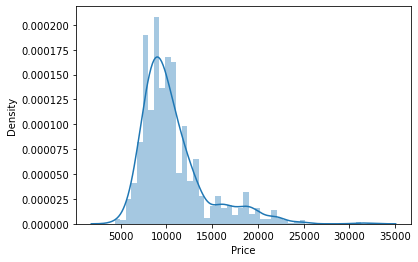

In [5]:
sns.distplot(toyota_data.Price)

In [6]:
model = smf.ols('Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=toyota_data).fit()

In [7]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     1131.
Date:                Mon, 31 May 2021   Prob (F-statistic):               0.00
Time:                        12:44:58   Log-Likelihood:                -12376.
No. Observations:                1436   AIC:                         2.477e+04
Df Residuals:                    1427   BIC:                         2.482e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -5573.1064   1411.390     -3.949      0.000   -8341.728   -2804.485
Age_08_04      -121.6584      2.616    -46.512      0.000    -126.789    -116.527
KM               -0.0208      0.001    -16.622      0.000      -0.023      -0.018
HP               31.6809      2.818     11.241      0.000      26.152      37.209
cc               -0.1211      0.090     -1.344      0.179      -0.298       0.056
Doors            -1.6166     40.006     -0.040      0.968     -80.093      76.859
Gears           594.3199    197.055      3.016      0.003     207.771     980.869
Quarterly_Tax     3.9491      1.310      3.015      0.003       1.379       6.519
Weight           16.9586      1.068     15.880      0.000      14.864      19.054
==============================================================================
Omnibus:                      151.719   Durbin-Watson:                   1.543
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1011.853
Skew:                          -0.219   Prob(JB):                    1.90e-220
Kurtosis:                       7.089   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [8]:
model.rsquared,model.aic, model.pvalues

(0.8637627463428192,
 24769.07664007625,
 Intercept         8.241949e-05
 Age_08_04        3.354724e-288
 KM                7.538439e-57
 HP                3.757218e-28
 cc                1.790902e-01
 Doors             9.677716e-01
 Gears             2.606549e-03
 Quarterly_Tax     2.619148e-03
 Weight            2.048576e-52
 dtype: float64)

In [9]:
# the p value of cc and door is > 0.05,so lets check individually

In [10]:
mdl_cc = smf.ols('Price~cc',data=toyota_data).fit()
mdl_cc.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     23.28
Date:                Mon, 31 May 2021   Prob (F-statistic):           1.55e-06
Time:                        12:44:59   Log-Likelihood:                -13795.
No. Observations:                1436   AIC:                         2.759e+04
Df Residuals:                    1434   BIC:                         2.760e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   9027.5548    365.576     24.694      0.000    8310.435    9744.675
cc             1.0802      0.224      4.825      0.000       0.641       1.519
==============================================================================
Omnibus:                      465.181   Durbin-Watson:                   0.267
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1390.401
Skew:                           1.649   Prob(JB):                    1.20e-302
Kurtosis:                       6.516   Cond. No.                     6.29e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.29e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [11]:
mdl_cc.pvalues

Intercept    1.766912e-112
cc            1.550808e-06
dtype: float64

In [12]:
mdl_doors = smf.ols('Price~Doors',data=toyota_data).fit()
mdl_doors.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.034
Method:                 Least Squares   F-statistic:                     51.00
Date:                Mon, 31 May 2021   Prob (F-statistic):           1.46e-12
Time:                        12:45:00   Log-Likelihood:                -13782.
No. Observations:                1436   AIC:                         2.757e+04
Df Residuals:                    1434   BIC:                         2.758e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7885.0058    409.438     19.258      0.000    7081.843    8688.168
Doors        705.5586     98.795      7.142      0.000     511.761     899.356
==============================================================================
Omnibus:                      466.779   Durbin-Watson:                   0.287
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1406.209
Skew:                           1.651   Prob(JB):                    4.42e-306
Kurtosis:                       6.549   Cond. No.                         19.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
mdl_doors.pvalues

Intercept    1.094732e-73
Doors        1.461237e-12
dtype: float64

In [14]:
mdl_cc_doors = smf.ols('Price~cc+Doors',data=toyota_data).fit()
mdl_cc_doors.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.047
Model:                            OLS   Adj. R-squared:                  0.046
Method:                 Least Squares   F-statistic:                     35.24
Date:                Mon, 31 May 2021   Prob (F-statistic):           1.15e-15
Time:                        12:45:00   Log-Likelihood:                -13772.
No. Observations:                1436   AIC:                         2.755e+04
Df Residuals:                    1433   BIC:                         2.757e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   6509.4211    515.773     12.621      0.000    5497.670    7521.173
cc             0.9597      0.221      4.340      0.000       0.526       1.393
Doors        671.3973     98.501      6.816      0.000     478.176     864.619
==============================================================================
Omnibus:                      448.845   Durbin-Watson:                   0.290
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1294.854
Skew:                           1.603   Prob(JB):                    6.70e-282
Kurtosis:                       6.370   Cond. No.                     9.09e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.09e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [15]:
mdl_cc_doors.pvalues

Intercept    1.056885e-34
cc           1.521992e-05
Doors        1.373469e-11
dtype: float64

In [16]:
model.rsquared,model.aic

(0.8637627463428192, 24769.07664007625)

In [17]:
model1 = smf.ols('Price~Age_08_04+KM+HP+cc+Doors+Gears',data=toyota_data).fit()
model1.rsquared,model1.aic

(0.817345037547313, 25186.11333931156)

In [18]:
model2 = smf.ols('Price~Age_08_04+KM+HP+cc+Gears+Quarterly_Tax+Weight',data=toyota_data).fit()
model2.rsquared,model2.aic

(0.8637625904386813, 24767.078283372837)

In [19]:
model3 = smf.ols('Price~Age_08_04+KM+HP+cc+Doors+Gears+Weight',data=toyota_data).fit()
model3.rsquared,model3.aic

(0.8628951602234526, 24776.19238098143)

In [20]:
model4 = smf.ols('Price~Age_08_04+KM+HP+Doors+Gears+Quarterly_Tax+Weight',data=toyota_data).fit()
model4.rsquared,model4.aic

(0.8635902364277144, 24768.893819473007)

In [21]:
data = {"model":["all","except tax,wgt","except doors","except qtr tax","except cc"],
       "rsquared":[model.rsquared,model1.rsquared,model2.rsquared,model3.rsquared,model4.rsquared],
        "AIC":[model.aic,model1.aic,model2.aic,model3.aic,model4.aic]
       }

table = pd.DataFrame(data)
table

,model,rsquared,AIC
0,all,0.863763,24769.076640
1,"except tax,wgt",0.817345,25186.113339
2,except doors,0.863763,24767.078283
3,except qtr tax,0.862895,24776.192381
4,except cc,0.863590,24768.893819


In [25]:
toyota_data.corr()

,Id,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,cc,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
Id,1.000000,-0.738250,0.906132,0.043742,-0.919523,0.273298,-0.109375,-0.079713,0.066265,-0.117704,...,-0.238940,-0.236723,-0.091587,-0.010971,-0.139708,-0.028704,-0.136398,-0.022232,-0.011611,0.159171
Price,-0.738250,1.000000,-0.876590,-0.018138,0.885159,-0.569960,0.314990,0.108905,0.033081,0.126389,...,0.343458,0.356518,0.064275,-0.041887,0.222083,0.164121,0.102569,0.108564,-0.043179,-0.172369
Age_08_04,0.906132,-0.876590,1.000000,-0.123255,-0.983661,0.505672,-0.156622,-0.108150,0.031717,-0.098084,...,-0.279631,-0.283856,-0.069192,0.013791,-0.126895,-0.110988,-0.116751,-0.040045,0.012857,0.188720
Mfg_Month,0.043742,-0.018138,-0.123255,1.000000,-0.057416,-0.020630,-0.039312,0.030266,0.009146,0.037387,...,0.010055,0.025185,-0.055495,0.031601,-0.033504,0.052789,0.023245,0.023506,0.032576,-0.042170
Mfg_Year,-0.919523,0.885159,-0.983661,-0.057416,1.000000,-0.504974,0.164697,0.103310,-0.033567,0.091892,...,0.279490,0.280996,0.079676,-0.019607,0.133737,0.102080,0.113237,0.036022,-0.018844,-0.182206
KM,0.273298,-0.569960,0.505672,-0.020630,-0.504974,1.000000,-0.333538,-0.080503,-0.081854,0.102683,...,-0.125177,-0.156242,0.007397,0.013661,-0.074327,-0.044784,-0.045658,-0.013599,0.015770,0.084153
HP,-0.109375,0.314990,-0.156622,-0.039312,0.164697,-0.333538,1.000000,0.058712,0.013144,0.035856,...,0.250122,0.265593,0.048850,0.020998,0.210571,-0.006027,0.010908,0.206784,0.019919,0.068271
Met_Color,-0.079713,0.108905,-0.108150,0.030266,0.103310,-0.080503,0.058712,1.000000,-0.019335,0.031812,...,0.153307,0.145147,0.086544,0.072756,0.023821,0.003779,0.037741,0.053829,0.071530,0.148536
Automatic,0.066265,0.033081,0.031717,0.009146,-0.033567,-0.081854,0.013144,-0.019335,1.000000,0.066740,...,-0.002502,-0.005864,-0.004469,-0.014600,0.003077,0.013175,-0.018876,-0.078095,-0.014150,0.018786
cc,-0.117704,0.126389,-0.098084,0.037387,0.091892,0.102683,0.035856,0.031812,0.066740,1.000000,...,0.072634,0.055299,0.032933,-0.000361,0.017326,-0.035195,-0.055711,0.003236,-0.000470,0.002725


In [22]:
# VIF

rsq_age = smf.ols('Age_08_04~KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=toyota_data).fit().rsquared
vif_age = 1/(1-rsq_age)

rsq_KM = smf.ols('KM~Age_08_04+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=toyota_data).fit().rsquared
vif_KM = 1/(1-rsq_KM)

rsq_HP = smf.ols('HP~Age_08_04+KM+cc+Doors+Gears+Quarterly_Tax+Weight',data=toyota_data).fit().rsquared
vif_HP = 1/(1-rsq_HP)

rsq_cc = smf.ols('cc~Age_08_04+HP+KM+Doors+Gears+Quarterly_Tax+Weight',data=toyota_data).fit().rsquared
vif_cc = 1/(1-rsq_cc)

rsq_doors = smf.ols('Doors~Age_08_04+HP+cc+KM+Gears+Quarterly_Tax+Weight',data=toyota_data).fit().rsquared
vif_doors = 1/(1-rsq_doors)

rsq_gears = smf.ols('Gears~Age_08_04+HP+cc+Doors+KM+Quarterly_Tax+Weight',data=toyota_data).fit().rsquared
vif_gears = 1/(1-rsq_gears)

rsq_qtrtax = smf.ols('Quarterly_Tax~Age_08_04+HP+cc+Doors+Gears+KM+Weight',data=toyota_data).fit().rsquared
vif_qtrtax = 1/(1-rsq_qtrtax)

rsq_weight = smf.ols('Weight~Age_08_04+HP+cc+Doors+Gears+Quarterly_Tax+KM',data=toyota_data).fit().rsquared
vif_weight = 1/(1-rsq_weight)

In [23]:
data1 = {"variable":["age","KM","HP","cc","doors","gears","qtr tax","weight"],
         "VIF":[vif_age,vif_KM,vif_HP,vif_cc,vif_doors,vif_gears,vif_qtrtax,vif_weight]
        }
table1 = pd.DataFrame(data1)
table1

,variable,VIF
0,age,1.884620
1,KM,1.756905
2,HP,1.419422
3,cc,1.163894
4,doors,1.156575
5,gears,1.098723
6,qtr tax,2.311431
7,weight,2.516420


In [26]:
table

,model,rsquared,AIC
0,all,0.863763,24769.076640
1,"except tax,wgt",0.817345,25186.113339
2,except doors,0.863763,24767.078283
3,except qtr tax,0.862895,24776.192381
4,except cc,0.863590,24768.893819


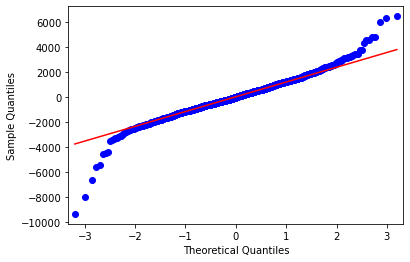

In [27]:
#QQplot
import statsmodels.api as sm

qqplot=sm.qqplot(model.resid,line='q')
plt.show()

In [28]:
list(np.where(model.resid>4000))

[array([ 109,  110,  111,  125,  147,  171,  523, 1058])]

In [29]:
list(np.where(model.resid<-4000))

[array([191, 192, 221, 393, 402, 601, 654, 960])]

In [30]:
# residual plot for homoscadaticity 

def get_standarddized_values(vals):
    return (vals - vals.mean()/vals.std())

Text(0, 0.5, 'standarddized residuals')

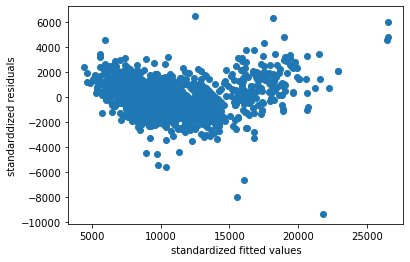

In [31]:
plt.scatter(get_standarddized_values(model.fittedvalues),get_standarddized_values(model.resid))
plt.xlabel("standardized fitted values")
plt.ylabel("standarddized residuals")

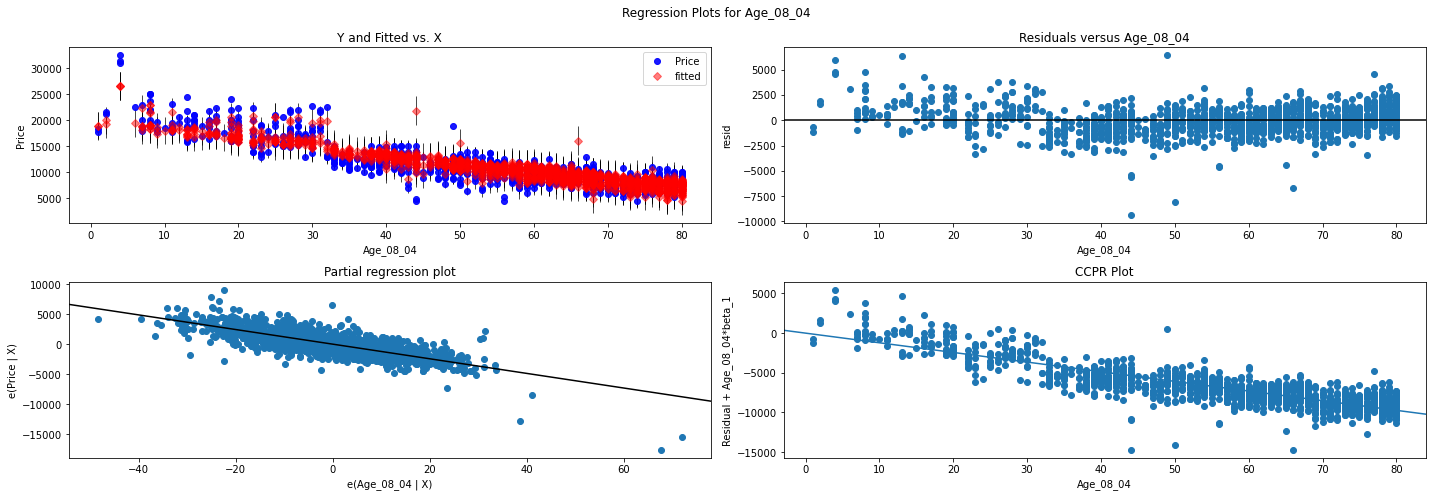

In [32]:
# residual vs regressors

fig = plt.figure(figsize=(20,7))
fig = sm.graphics.plot_regress_exog(model,'Age_08_04',fig=fig)

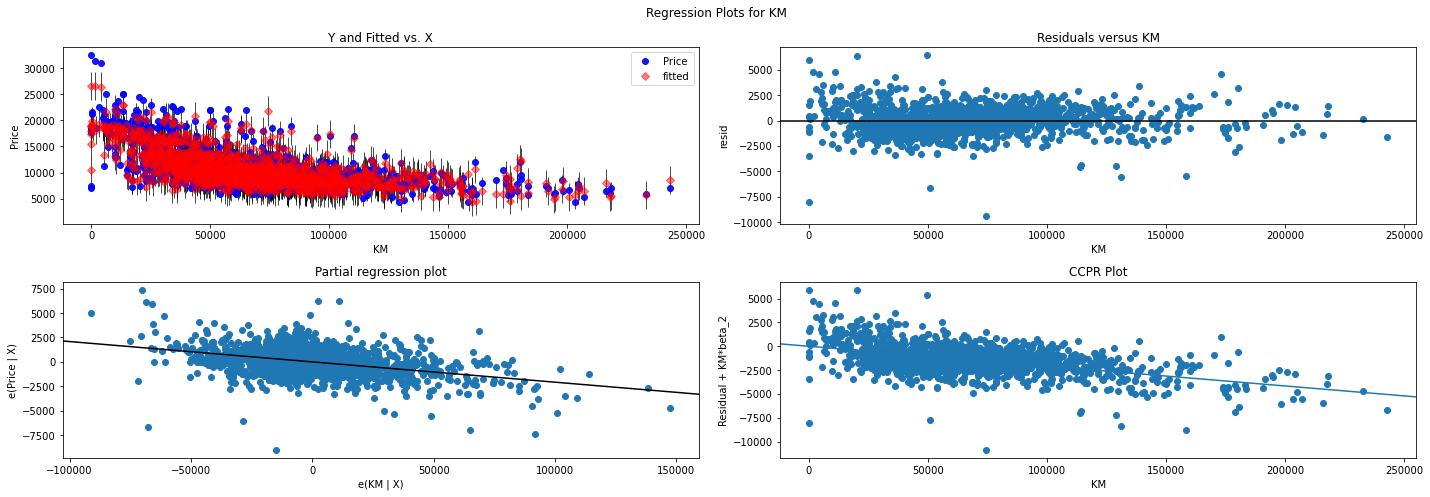

In [33]:
fig = plt.figure(figsize=(20,7))
fig = sm.graphics.plot_regress_exog(model,'KM',fig=fig)

In [26]:
#cooks distance

model_influence = model.get_influence()
(c,_) = model_influence.cooks_distance

<StemContainer object of 3 artists>

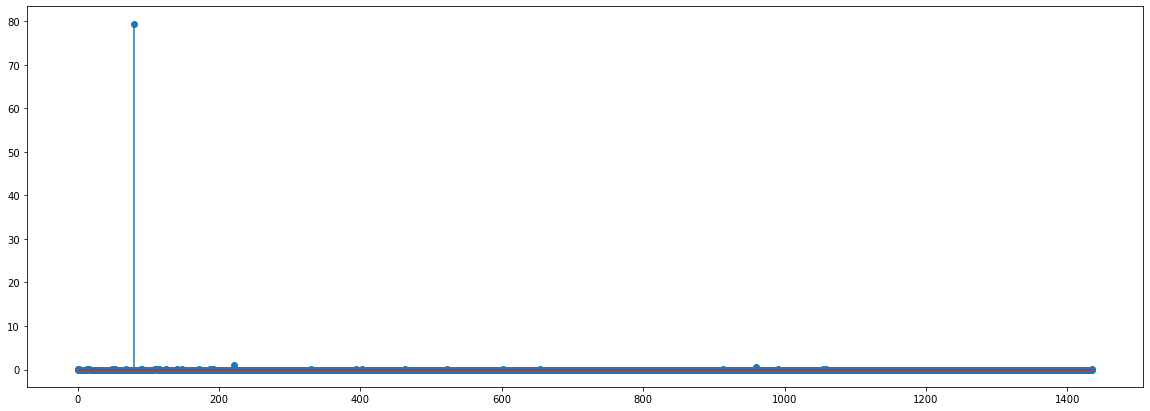

In [38]:
fig = plt.figure(figsize= (20,7))
plt.stem(np.arange(len(toyota_data)),np.round(c,2))

In [34]:
np.argmax(c),np.max(c)

(80, 79.52010624138055)

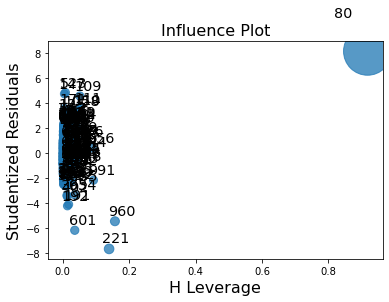

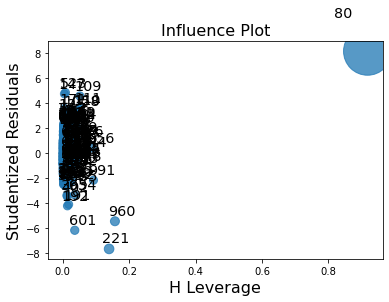

In [37]:
from statsmodels.graphics.regressionplots import influence_plot

influence_plot(model)

In [40]:
toyota_data[toyota_data.index.isin([80])]

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
80,81,TOYOTA Corolla 1.6 5drs 1 4/5-Doors,18950,25,8,2002,20019,Petrol,110,1,...,1,1,1,0,0,0,0,0,0,0


In [42]:
car_data1 = pd.read_csv("ToyotaCorolla.csv",encoding='unicode_escape')
car_data1[car_data1.index.isin([80])]

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
80,81,TOYOTA Corolla 1.6 5drs 1 4/5-Doors,18950,25,8,2002,20019,Petrol,110,1,...,1,1,1,0,0,0,0,0,0,0


In [43]:
car_data1 = car_data1.drop(car_data1.index[[80]],axis=0).reset_index()
car_data1.head()

,index,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,...,1,1,1,0,0,0,1,0,0,0
1,1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,...,1,0,1,0,0,0,1,0,0,0
2,2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,...,0,0,1,0,0,0,1,0,0,0
3,3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,...,0,0,1,0,0,0,1,0,0,0
4,4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,...,1,1,1,0,1,0,1,0,0,0


In [44]:
mdl1 = smf.ols('Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=car_data1).fit()
mdl1.rsquared,mdl1.aic

(0.8693790488655819, 24687.28102432684)

In [45]:
model.rsquared,model.aic

(0.8637627463428192, 24769.07664007625)

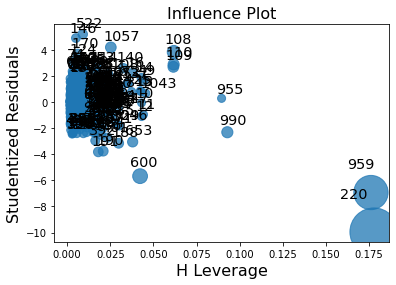

In [46]:


influence_plot(mdl1)
plt.show()

In [44]:
car_data1.shape

(1435, 39)

In [47]:
car_data1[car_data1.index.isin([220,959])]

,index,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
220,221,223,TOYOTA Corolla 1.6 HB LINEA SOL 4/5-Doors,12450,44,1,2001,74172,Petrol,110,...,1,1,1,0,0,0,1,0,0,0
959,960,964,TOYOTA Corolla,9390,66,3,1999,50806,Petrol,86,...,0,0,0,0,0,0,0,0,0,0


In [48]:
model_influence = mdl1.get_influence()
(c,_) = model_influence.cooks_distance

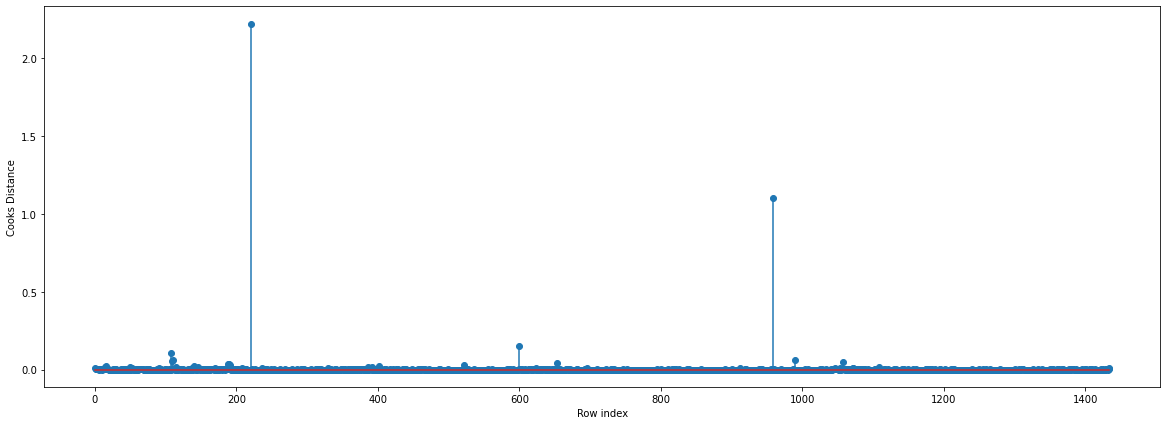

In [52]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(car_data1)),np.round(c,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

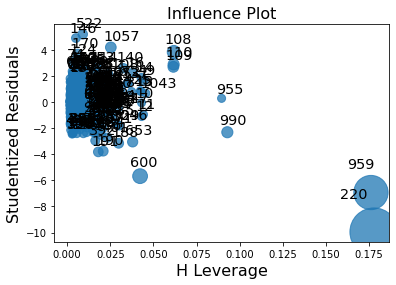

In [48]:
influence_plot(mdl1)
plt.show()

In [54]:
np.argmax(c),np.max(c)

(220, 2.2244611713001508)

In [55]:
# since np.max is still greater than 1, we need to use cooks distance further 
# to eliminate the outliers

In [56]:
car_data2 = pd.read_csv("ToyotaCorolla.csv",encoding='unicode_escape')


In [57]:
car_data2=car_data1.drop(car_data1.index[[220,959]],axis=0)

In [58]:
mdl2 = smf.ols('Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=car_data2).fit()

In [59]:
mdl2.rsquared,mdl2.aic

(0.8851845904421739, 24469.715205158594)

In [60]:
model_influence = mdl2.get_influence()
(c,_) = model_influence.cooks_distance

<StemContainer object of 3 artists>

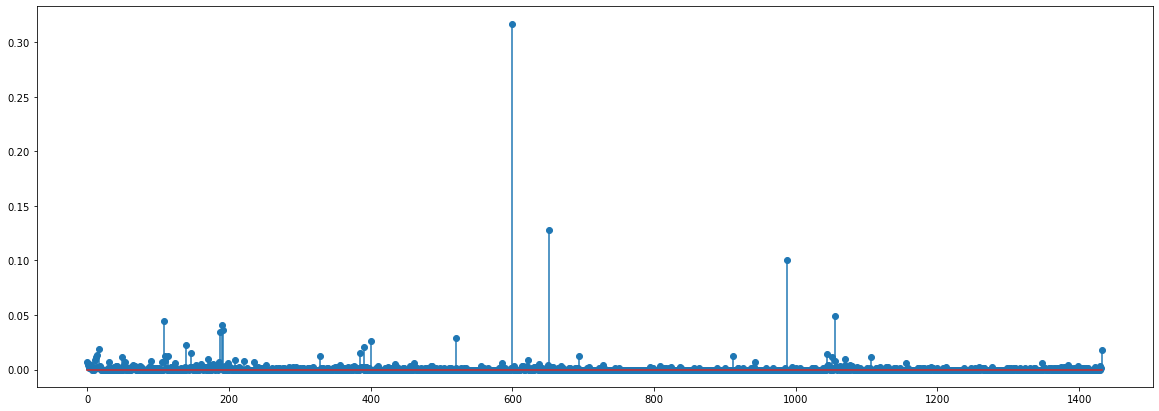

In [61]:
fig = plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(car_data2)),np.round(c,3))

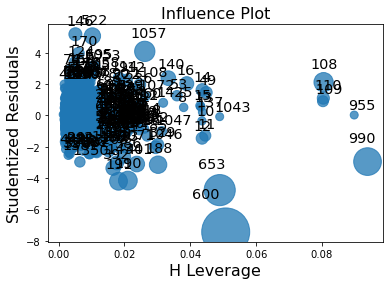

In [62]:
influence_plot(mdl2)
plt.show()

In [67]:
np.argmax(c),np.max(c)

(599, 0.3166131528144162)

In [68]:
mdl2.rsquared,mdl2.aic

(0.8851845904421739, 24469.715205158594)

In [69]:
data2 = {"Model":["model1","model2","model3"],
        "R squared":[model.rsquared,mdl1.rsquared,mdl2.rsquared],
         "aic":[model.aic,mdl1.aic,mdl2.aic]
        }
table2 = pd.DataFrame(data2)
table2

,Model,R squared,aic
0,model1,0.863763,24769.076640
1,model2,0.869379,24687.281024
2,model3,0.885185,24469.715205


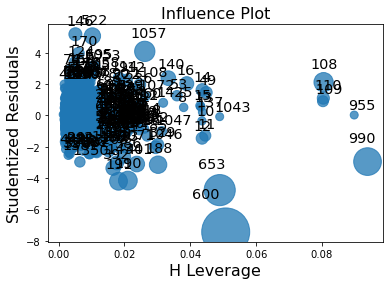

In [70]:
influence_plot(mdl2)
plt.show()

In [71]:
car_data3=car_data2.drop(car_data2.index[[600]],axis=0)

In [72]:
mdl3 = smf.ols('Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=car_data3).fit()

In [73]:
mdl3.rsquared,mdl3.aic

(0.8853625611788162, 24451.19008243933)

In [74]:
model_influence = mdl3.get_influence()
(c,_)=model_influence.cooks_distance

<StemContainer object of 3 artists>

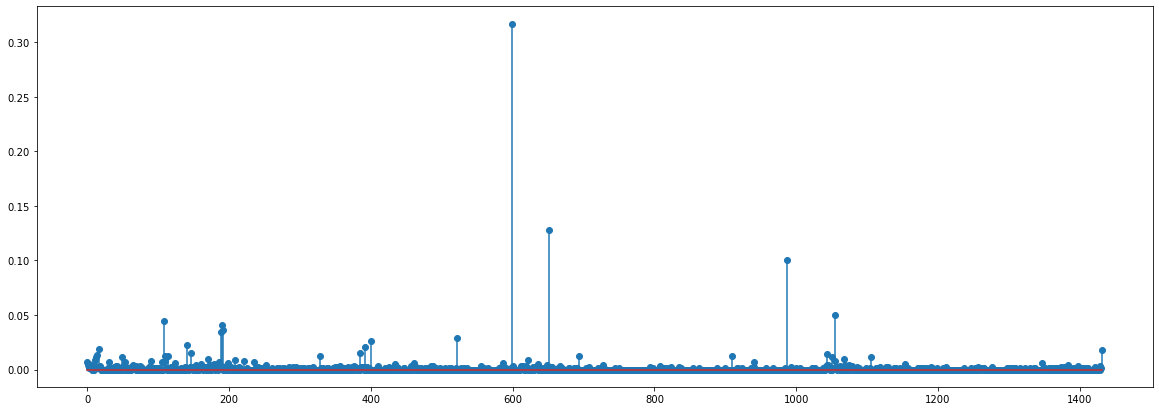

In [180]:
fig = plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(car_data3)),np.round(c,3))

In [183]:
np.argmax(c),np.max(c)

(599, 0.31686910758182435)

In [85]:
car_data3.shape

(1432, 39)

In [87]:
b=car_data3.Price

In [188]:
random_mdl = smf.ols('Price~Age_08_04+KM+HP+cc+Gears+Quarterly_Tax+Weight',data=car_data3).fit()

In [189]:
random_mdl.rsquared,random_mdl.aic

(0.884484095466464, 24460.12165519588)

In [208]:
car_data3["Price"]

0       13500
1       13750
2       13950
3       14950
4       13750
        ...  
1430     7500
1431    10845
1432     8500
1433     7250
1434     6950
Name: Price, Length: 1432, dtype: int64

In [190]:
# to predict on new data with mdl3

In [75]:
new_data_r = pd.DataFrame({"Age_08_04":40,"KM":45000,"HP":100,"cc":1500,"Doors":5,"Gears":5,"Quarterly_Tax":200,"Weight":1100},index=[1])

In [204]:
new_data_r

,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
1,40,45000,100,1500,5,5,200,1100


In [76]:
prdct = mdl3.predict(new_data_r)
prdct

1    14440.93756
dtype: float64

In [92]:
predict = mdl3.predict(car_data3)
predict

0       16337.240360
1       15895.162559
2       16315.064517
3       15983.858831
4       15850.581439
            ...     
1430     9121.569759
1431     8505.697794
1432     8651.531406
1433     8765.270896
1434    10641.182965
Length: 1432, dtype: float64

In [80]:
a=toyota_data["Price"].head()

In [82]:
!pip install ml_metrics

  Created wheel for ml-metrics: filename=ml_metrics-0.1.4-py3-none-any.whl size=7848 sha256=efc742cbac673da7ea7aad11e69b4b797bb5ea7efc6fe9ca0f4159777baaaf38
  Stored in directory: /Users/lakshmipriya/Library/Caches/pip/wheels/09/2d/e7/58a96e635aedc543a3a78ff855dc9911d98fc1640e3921c823
Successfully built ml-metrics
You should consider upgrading via the '/Users/lakshmipriya/opt/anaconda3/bin/python -m pip install --upgrade pip' command.


In [93]:
from ml_metrics import rmse
rmse(predict,b)

1226.847629123809

In [94]:
mdl3.rsquared

0.8853625611788162

In [95]:
mdl3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.885
Method:                 Least Squares   F-statistic:                     1374.
Date:                Mon, 31 May 2021   Prob (F-statistic):               0.00
Time:                        13:36:07   Log-Likelihood:                -12217.
No. Observations:                1432   AIC:                         2.445e+04
Df Residuals:                    1423   BIC:                         2.450e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1.469e+04   1432.612    -10.254      0.000   -1.75e+04   -1.19e+04
Age_08_04      -112.0360      2.478    -45.215      0.000    -116.897    -107.175
KM               -0.0170      0.001    -14.200      0.000      -0.019      -0.015
HP               36.5809      2.744     13.331      0.000      31.198      41.964
cc               -3.7958      0.302    -12.569      0.000      -4.388      -3.203
Doors          -123.7300     37.469     -3.302      0.001    -197.231     -50.229
Gears           463.8507    180.886      2.564      0.010     109.019     818.682
Quarterly_Tax     5.2361      1.371      3.820      0.000       2.547       7.925
Weight           30.6066      1.290     23.731      0.000      28.077      33.137
==============================================================================
Omnibus:                      122.028   Durbin-Watson:                   1.717
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              708.163
Skew:                          -0.081   Prob(JB):                    1.68e-154
Kurtosis:                       6.441   Cond. No.                     3.45e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.45e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""